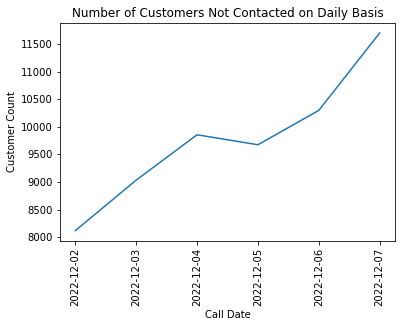

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read Portfolio_data.csv file
portfolio_data = pd.read_csv('Portfolio_data.csv')

# Read CommunicationHistory.csv file
communication_history = pd.read_csv('CommunicationHistory.csv')

# Get total number of customers
total_customers = portfolio_data['Loan Number'].nunique()

# Filter data where call status is not 'Completed'
incomplete_calls = communication_history[communication_history['Status'] != 'Completed']

# Convert call time to datetime object and extract date only
incomplete_calls['call_date'] = pd.to_datetime(incomplete_calls['Call time']).dt.date


# Group data by call date column and count unique number of customers for each date
uncontacted_customers_by_date = incomplete_calls.groupby('call_date')['Loan Number'].nunique().reset_index(name='count')

# Subtract the number of contacted customers from total customers to get number of uncontacted customers
uncontacted_customers_by_date['count'] = total_customers - uncontacted_customers_by_date['count']

# Plot line chart to visualize the distribution
plt.plot(uncontacted_customers_by_date['call_date'], uncontacted_customers_by_date['count'])
plt.title('Number of Customers Not Contacted on Daily Basis')
plt.xlabel('Call Date')
plt.ylabel('Customer Count')
plt.xticks(rotation=90)
plt.show()
